In [89]:
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import notebook
import FinanceDataReader as fdr
import matplotlib.pyplot as plt

# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

# 1. Data

In [90]:
year_list = [2019 ,2020 ,2021 ,2022 ,2023]

for year in year_list:
    globals()[f'div_{year}'] = \
    pd.read_csv(f'./data/{year}.txt', sep = "\t",  engine='python', encoding = "cp949", header=1, index_col=0)[:-1]


In [91]:
for year in year_list:
    globals()[f'div_{year}'] = \
    eval(f'div_{year}').sort_values('배당수익률 ▼', ascending=False).reset_index().rename(columns = {'배당수익률 ▼': '배당수익률'})

In [92]:
div_2019.head()

,연번,종목명,1Q,2Q,3Q,4Q,합계,종가,배당수익률
0,146,쌍용C&E,100,100,110,110,420,"5,670",7.40
1,53,두산,"1,300","1,300","1,300","1,300","5,200","70,300",7.39
2,10,효성,NaN,NaN,NaN,"5,000","5,000","79,100",6.32
3,83,우리금융지주,NaN,NaN,NaN,700,700,"11,600",6.03
4,113,DGB금융지주,NaN,NaN,NaN,410,410,"7,120",5.75


In [93]:
df_krx = fdr.StockListing('KRX')
df_krx = df_krx[['Code', 'Name']]
df_krx.columns = ['Code', '종목명']
df_krx.head()

,Code,종목명
0,005930,삼성전자
1,373220,LG에너지솔루션
2,000660,SK하이닉스
3,207940,삼성바이오로직스
4,005490,POSCO홀딩스


In [94]:
for year in year_list:
    globals()[f'div_{year}_code'] = \
    pd.merge(eval(f'div_{year}'), df_krx, how='inner', on='종목명')[['Code', '종목명', '배당수익률']]

In [95]:
for year in year_list:
    print(f'[{year}]')
    tmp_dict = {}
    for cd in notebook.tqdm(eval(f'div_{year}_code').Code):
        tmp_dict[cd] = fdr.DataReader(cd, f'{year}',f'{year+1}').Close
    globals()[f'price_{year}'] = pd.DataFrame(tmp_dict)
    eval(f'price_{year}').to_csv(f'./data/price_{year}.csv')

[2019]


  0%|          | 0/200 [00:00<?, ?it/s]

[2020]


  0%|          | 0/200 [00:00<?, ?it/s]

[2021]


  0%|          | 0/200 [00:00<?, ?it/s]

[2022]


  0%|          | 0/200 [00:00<?, ?it/s]

[2023]


  0%|          | 0/200 [00:00<?, ?it/s]

# 2. Analysis

In [119]:
for year in year_list:
    globals()[f'price_{year}'] = \
    pd.read_csv(f'./data/price_{year}.csv', engine='python', encoding = "cp949", index_col=0)[:-1]

In [166]:
for year in year_list:
    globals()[f'ret_{year}'] = \
    eval(f'price_{year}').pct_change().cumsum()

In [169]:

ret_2022.tail()

,175330,316140,024110,138930,139130,001120,029780,267250,005940,086790,...,015760,047040,361610,192820,034220,009540,064350,259960,010140,088350
Date,,,,,,,,,,,,,,,,,,,,,
2022-12-22,0.041635,0.056117,0.088973,-0.114976,-0.152126,0.537035,0.051788,0.228370,-0.212618,0.114336,...,0.021769,-0.211019,-0.907549,-0.093066,-0.567093,-0.180226,0.372131,-0.803892,-0.043254,-0.081709
2022-12-23,0.036884,0.044490,0.088973,-0.123184,-0.153400,0.535822,0.059457,0.222225,-0.212618,0.099987,...,0.028666,-0.240699,-0.949072,-0.118347,-0.590170,-0.205902,0.346815,-0.840205,-0.052870,-0.089630
2022-12-26,0.036884,0.044490,0.084468,-0.124563,-0.155951,0.538250,0.064023,0.208315,-0.202287,0.098867,...,0.019533,-0.235994,-0.943657,-0.116906,-0.598044,-0.207289,0.370933,-0.843104,-0.064520,-0.075658
2022-12-27,0.038078,0.064097,0.098043,-0.124563,-0.149557,0.549145,0.053417,0.206748,-0.211490,0.114562,...,0.010317,-0.241848,-0.936475,-0.066546,-0.574234,-0.186456,0.416223,-0.840197,-0.046839,-0.067784
2022-12-28,-0.019133,-0.028210,-0.009100,-0.207436,-0.235961,0.411421,-0.026215,0.150233,-0.284761,0.045026,...,0.054503,-0.235959,-0.977474,-0.062437,-0.593614,-0.190537,0.390227,-0.857588,-0.039116,-0.011143


In [121]:
q8_6['Code']

31    032830
32    241560
33    000810
34    006800
35    030000
36    114090
37    005380
38    010130
39    001450
40    006360
41    035250
42    006260
43    011170
44    272210
45    003550
46    105630
47    018880
48    005830
49    004990
50    032640
51    000880
52    023530
53    012750
54    000270
55    001680
56    021240
57    005930
58    057050
59    086280
60    000240
Name: Code, dtype: object

In [160]:
q10 = div_2019_code.dropna().배당수익률.quantile(q=1, interpolation='nearest')
q8 = div_2019_code.dropna().배당수익률.quantile(q=0.8, interpolation='nearest')
q6 = div_2019_code.dropna().배당수익률.quantile(q=0.6, interpolation='nearest')
q4 = div_2019_code.dropna().배당수익률.quantile(q=0.4, interpolation='nearest')
q2 = div_2019_code.dropna().배당수익률.quantile(q=0.2, interpolation='nearest')

q10_8 = div_2019_code.iloc[div_2019_code[div_2019_code['배당수익률'] == q10].index[0]:div_2019_code[div_2019_code['배당수익률'] == q8].index[0],:]
q8_6 = div_2019_code.iloc[div_2019_code[div_2019_code['배당수익률'] == q8].index[0]:div_2019_code[div_2019_code['배당수익률'] == q6].index[0],:]
q6_4 = div_2019_code.iloc[div_2019_code[div_2019_code['배당수익률'] == q6].index[0]:div_2019_code[div_2019_code['배당수익률'] == q4].index[0],:]                   
q4_2 = div_2019_code.iloc[div_2019_code[div_2019_code['배당수익률'] == q4].index[0]:div_2019_code[div_2019_code['배당수익률'] == q2].index[0],:]
q2_0 = div_2019_code.iloc[div_2019_code[div_2019_code['배당수익률'] == q2].index[0]:,:]

q10_8_ticker_list = [i for i in [j for j in q10_8['Code']] if i in ret_2020.columns]
q8_6_ticker_list =[i for i in [j for j in q8_6['Code']] if i in ret_2020.columns]
q6_4_ticker_list =[i for i in [j for j in q6_4['Code']] if i in ret_2020.columns]
q4_2_ticker_list =[i for i in [j for j in q4_2['Code']] if i in ret_2020.columns]
q2_0_ticker_list =[i for i in [j for j in q2_0['Code']] if i in ret_2020.columns]

q10_8_ret_sum = ret_2020[q10_8_ticker_list].sum(axis=1)
q8_6_ret_sum = ret_2020[q8_6_ticker_list].sum(axis=1)
q6_4_ret_sum = ret_2020[q6_4_ticker_list].sum(axis=1)
q4_2_ret_sum = ret_2020[q4_2_ticker_list].sum(axis=1)
q2_0_ret_sum = ret_2020[q2_0_ticker_list].sum(axis=1)

div_factor = pd.DataFrame({'q10_8':q10_8_ret_sum, 'q8_6':q8_6_ret_sum, 
                             'q6_4':q6_4_ret_sum, 'q4_2':q4_2_ret_sum, 
                             'q2_0':q2_0_ret_sum})

div_factor

,q10_8,q8_6,q6_4,q4_2,q2_0
Date,,,,,
2020-01-02,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-03,0.088767,-0.103726,-0.025608,0.021591,-0.012681
2020-01-06,-0.428284,-0.516021,-0.500799,-0.400916,-0.446815
2020-01-07,-0.330155,-0.351202,-0.241135,-0.180767,0.284738
2020-01-08,-1.071434,-0.875788,-1.048401,-0.849401,-0.576674
...,...,...,...,...,...
2020-12-22,2.830908,5.082928,6.496087,8.107445,18.903920
2020-12-23,2.885698,5.305501,6.794588,8.686821,18.273380
2020-12-24,3.357866,5.755355,7.110255,8.912707,18.354882


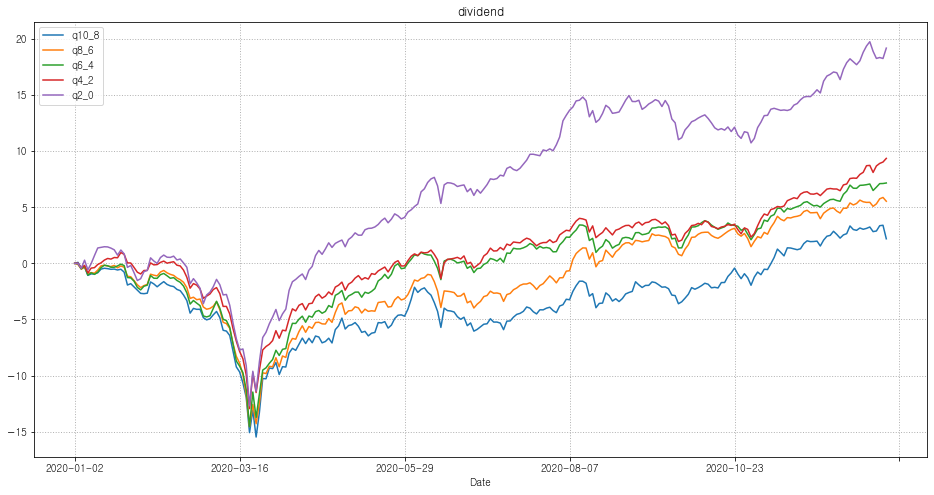

In [161]:
div_factor.plot(legend=True, figsize=(16,8), title ='dividend');
plt.grid(True, color = '0.7', linestyle =':', linewidth=1)
plt.show();

In [163]:
def div_factor(div_2019_code, ret_2020):
    q10 = div_2019_code.dropna().배당수익률.quantile(q=1, interpolation='nearest')
    q8 = div_2019_code.dropna().배당수익률.quantile(q=0.8, interpolation='nearest')
    q6 = div_2019_code.dropna().배당수익률.quantile(q=0.6, interpolation='nearest')
    q4 = div_2019_code.dropna().배당수익률.quantile(q=0.4, interpolation='nearest')
    q2 = div_2019_code.dropna().배당수익률.quantile(q=0.2, interpolation='nearest')

    q10_8 = div_2019_code.iloc[div_2019_code[div_2019_code['배당수익률'] == q10].index[0]:div_2019_code[div_2019_code['배당수익률'] == q8].index[0],:]
    q8_6 = div_2019_code.iloc[div_2019_code[div_2019_code['배당수익률'] == q8].index[0]:div_2019_code[div_2019_code['배당수익률'] == q6].index[0],:]
    q6_4 = div_2019_code.iloc[div_2019_code[div_2019_code['배당수익률'] == q6].index[0]:div_2019_code[div_2019_code['배당수익률'] == q4].index[0],:]                   
    q4_2 = div_2019_code.iloc[div_2019_code[div_2019_code['배당수익률'] == q4].index[0]:div_2019_code[div_2019_code['배당수익률'] == q2].index[0],:]
    q2_0 = div_2019_code.iloc[div_2019_code[div_2019_code['배당수익률'] == q2].index[0]:,:]

    q10_8_ticker_list = [i for i in [j for j in q10_8['Code']] if i in ret_2020.columns]
    q8_6_ticker_list =[i for i in [j for j in q8_6['Code']] if i in ret_2020.columns]
    q6_4_ticker_list =[i for i in [j for j in q6_4['Code']] if i in ret_2020.columns]
    q4_2_ticker_list =[i for i in [j for j in q4_2['Code']] if i in ret_2020.columns]
    q2_0_ticker_list =[i for i in [j for j in q2_0['Code']] if i in ret_2020.columns]

    q10_8_ret_sum = ret_2020[q10_8_ticker_list].sum(axis=1)
    q8_6_ret_sum = ret_2020[q8_6_ticker_list].sum(axis=1)
    q6_4_ret_sum = ret_2020[q6_4_ticker_list].sum(axis=1)
    q4_2_ret_sum = ret_2020[q4_2_ticker_list].sum(axis=1)
    q2_0_ret_sum = ret_2020[q2_0_ticker_list].sum(axis=1)

    div_factor = pd.DataFrame({'q10_8':q10_8_ret_sum, 'q8_6':q8_6_ret_sum, 
                                 'q6_4':q6_4_ret_sum, 'q4_2':q4_2_ret_sum, 
                                 'q2_0':q2_0_ret_sum})

    div_factor.plot(legend=True, figsize=(16,8), title ='dividend');
    plt.grid(True, color = '0.7', linestyle =':', linewidth=1)
    plt.show();

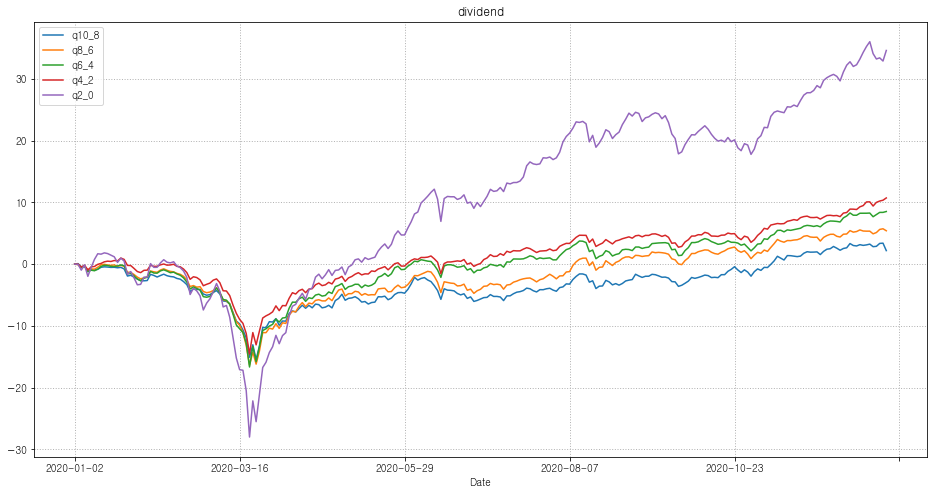

In [171]:
div_factor(div_2019_code, ret_2020)

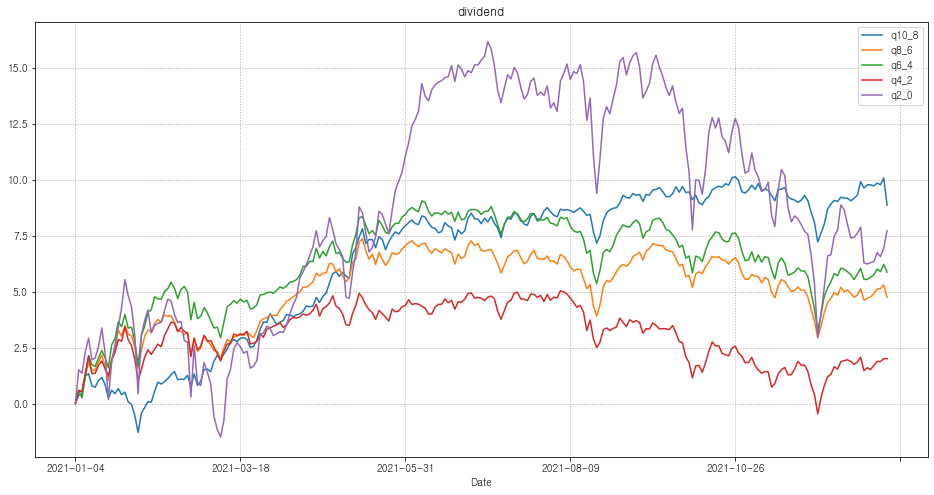

In [172]:
div_factor(div_2020_code, ret_2021)

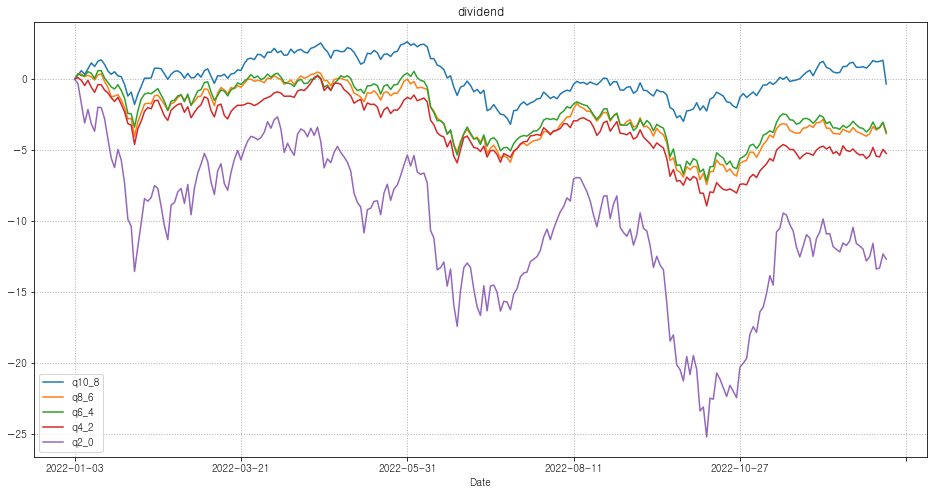

In [173]:
div_factor(div_2021_code, ret_2022)

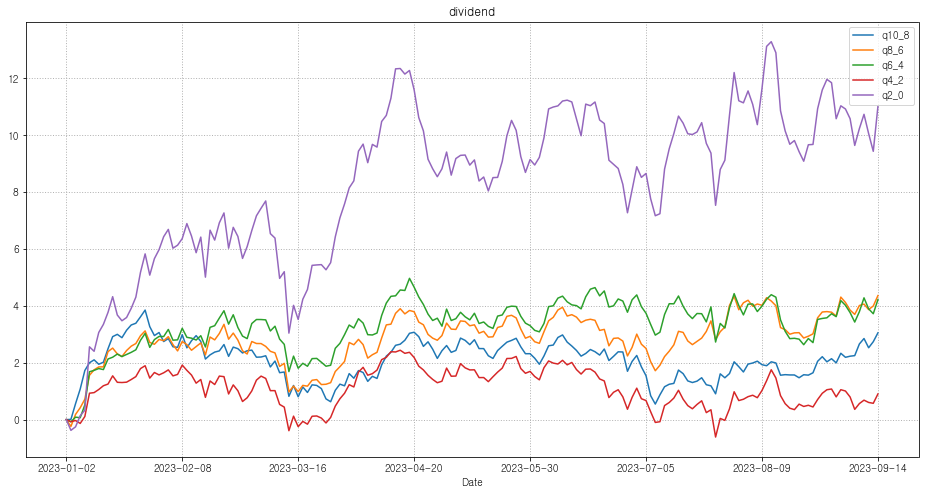

In [174]:
div_factor(div_2022_code, ret_2023)